In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/drive/MyDrive/mxmh_survey_results.csv')
df

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


Timestamp,Permissions column is not useful hence dropping it

In [3]:
df.drop(['Timestamp','Permissions', 'Music effects'],axis=1,inplace=True)
df

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD
0,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,...,Never,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0
1,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,119.0,...,Never,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0
2,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,...,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0
3,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,...,Never,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0
4,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,...,Never,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,120.0,...,Rarely,Very frequently,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0
732,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,160.0,...,Never,Very frequently,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0
733,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,120.0,...,Rarely,Sometimes,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0
734,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,170.0,...,Never,Never,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0


In [4]:
df.shape

(736, 30)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           735 non-null    float64
 1   Primary streaming service     735 non-null    object 
 2   Hours per day                 736 non-null    float64
 3   While working                 733 non-null    object 
 4   Instrumentalist               732 non-null    object 
 5   Composer                      735 non-null    object 
 6   Fav genre                     736 non-null    object 
 7   Exploratory                   736 non-null    object 
 8   Foreign languages             732 non-null    object 
 9   BPM                           629 non-null    float64
 10  Frequency [Classical]         736 non-null    object 
 11  Frequency [Country]           736 non-null    object 
 12  Frequency [EDM]               736 non-null    object 
 13  Frequ

In [6]:
df.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,735.000000,736.000000,6.290000e+02,736.000000,736.000000,736.000000,736.000000
mean,25.206803,3.572758,1.589948e+06,5.837636,4.796196,3.738451,2.637228
std,12.054970,3.028199,3.987261e+07,2.793054,3.028870,3.088689,2.842017
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.000000e+02,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,1.440000e+02,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


Finding the Null values and handling them

In [7]:
df[df.columns[df.isnull().any()]].isnull().sum()

Age                            1
Primary streaming service      1
While working                  3
Instrumentalist                4
Composer                       1
Foreign languages              4
BPM                          107
dtype: int64

In [8]:
df.dropna(subset=['Age','Primary streaming service','While working','Instrumentalist','Composer','Foreign languages'],inplace=True)

In [9]:
#Since BPM has many null values we will replace it with the median value
df[df.columns[df.isnull().any()]].isnull().sum()

BPM    104
dtype: int64

In [10]:
df['BPM']=df['BPM'].fillna(df['BPM'].median())

In [11]:
df.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,725.000000,725.000000,7.250000e+02,725.000000,725.000000,725.000000,725.000000
mean,25.246897,3.562828,1.379433e+06,5.828276,4.798621,3.705517,2.623448
std,12.089035,3.007926,3.713906e+07,2.791282,3.027065,3.078705,2.842724
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.050000e+02,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,1.400000e+02,8.000000,7.000000,6.000000,4.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


Outlier Detection and Handling

In [12]:
df1=df[['Age','Hours per day']]

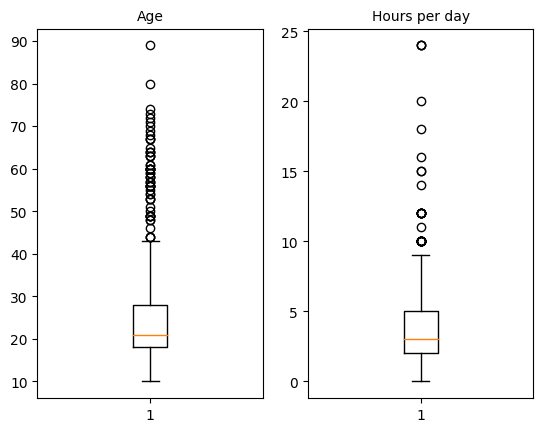

In [13]:
fig,axs=plt.subplots(1,2)
for i,ax in enumerate(axs.flat):
    ax.boxplot(df1.iloc[:,i])
    ax.set_title(df1.columns[i],fontsize=10)

plt.show()

In [14]:
df_drop=df.copy(deep = True)
df_drop=df_drop.loc[~(df_drop['Age']>58.0)]
df_drop=df_drop.loc[~(df_drop['Hours per day']>14.0)]
df_drop=df_drop.loc[~(df_drop['BPM']>245.0)]

In [15]:
df_drop.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000
mean,23.569141,3.410189,123.081514,5.898836,4.866084,3.708151,2.671033
std,8.794252,2.491819,31.033966,2.772790,3.012409,3.064357,2.863807
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,105.000000,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,120.000000,6.000000,5.000000,3.000000,2.000000
75%,26.000000,4.750000,140.000000,8.000000,7.000000,6.000000,5.000000
max,58.000000,14.000000,220.000000,10.000000,10.000000,10.000000,10.000000


In [16]:
df

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD
0,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,...,Never,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0
1,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,119.0,...,Never,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0
2,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,...,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0
3,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,...,Never,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0
4,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,...,Never,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,120.0,...,Rarely,Very frequently,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0
732,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,160.0,...,Never,Very frequently,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0
733,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,120.0,...,Rarely,Sometimes,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0
734,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,170.0,...,Never,Never,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0


Skewness

In [17]:
df_drop.skew(numeric_only  = True)

Age              1.775179
Hours per day    1.359211
BPM              0.133252
Anxiety         -0.449070
Depression      -0.086594
Insomnia         0.409555
OCD              0.931006
dtype: float64

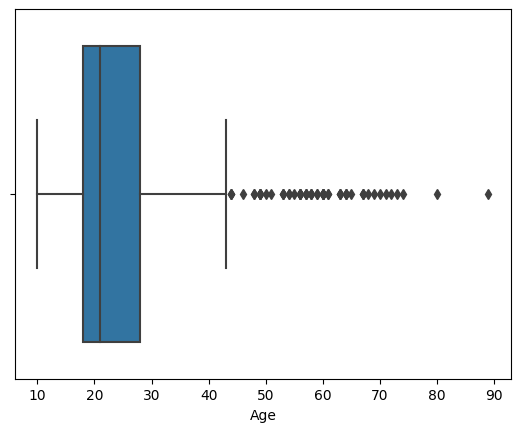

In [18]:
sns.boxplot(data = df, x = 'Age')
plt.show()

The plot is right skewed.

Correlation map

In [19]:
corr=df_drop.corr()
corr

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
Age,1.000000,-0.085642,0.033618,-0.143769,-0.039048,0.055694,-0.068900
Hours per day,-0.085642,1.000000,0.045838,0.078360,0.127819,0.144601,0.106540
BPM,0.033618,0.045838,1.000000,0.027073,0.029314,0.047133,-0.033715
Anxiety,-0.143769,0.078360,0.027073,1.000000,0.507189,0.271876,0.339961
Depression,-0.039048,0.127819,0.029314,0.507189,1.000000,0.372426,0.168548
Insomnia,0.055694,0.144601,0.047133,0.271876,0.372426,1.000000,0.224129
OCD,-0.068900,0.106540,-0.033715,0.339961,0.168548,0.224129,1.000000


<Axes: >

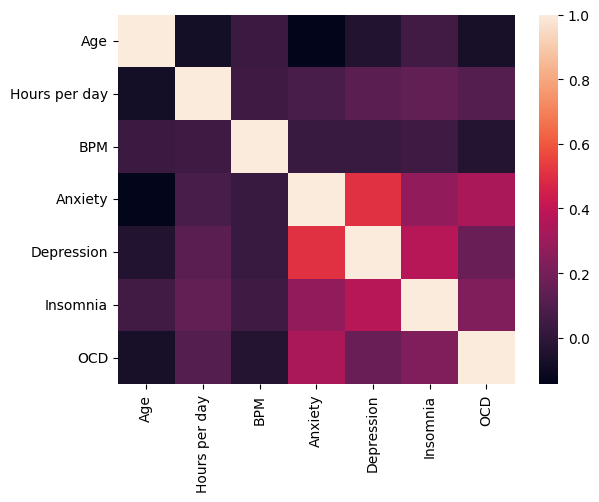

In [20]:
sns.heatmap(corr)

 There is a strong direct correlation between Anxiety and Depression.

 Moderate correlation between Depression and Insomnia.

 Moderate correlation between Anxiety and OCD.

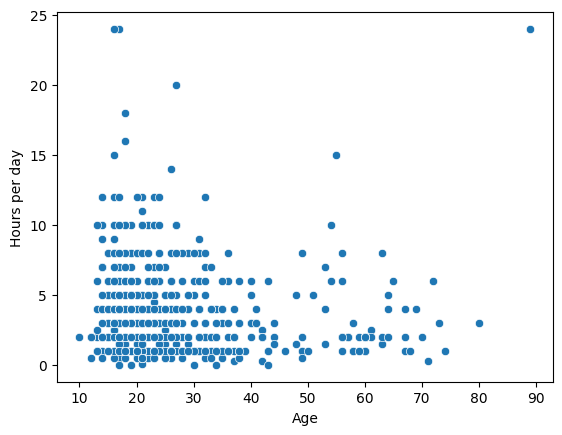

In [21]:
sns.scatterplot(data=df, x = 'Age', y = 'Hours per day')
plt.show()

Most of the listeners of age group between 10 to 40 listen to music for more than 8 hours per day. A very small portion of them even listen for more than 12 hours a day. While the listeners between age group of 50 to 80 listen for maybe 2-3 hours a day. And very few of them listen for 6-8 hours per day.

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Hours per day'}>,
        <Axes: title={'center': 'BPM'}>],
       [<Axes: title={'center': 'Anxiety'}>,
        <Axes: title={'center': 'Depression'}>,
        <Axes: title={'center': 'Insomnia'}>],
       [<Axes: title={'center': 'OCD'}>, <Axes: >, <Axes: >]],
      dtype=object)

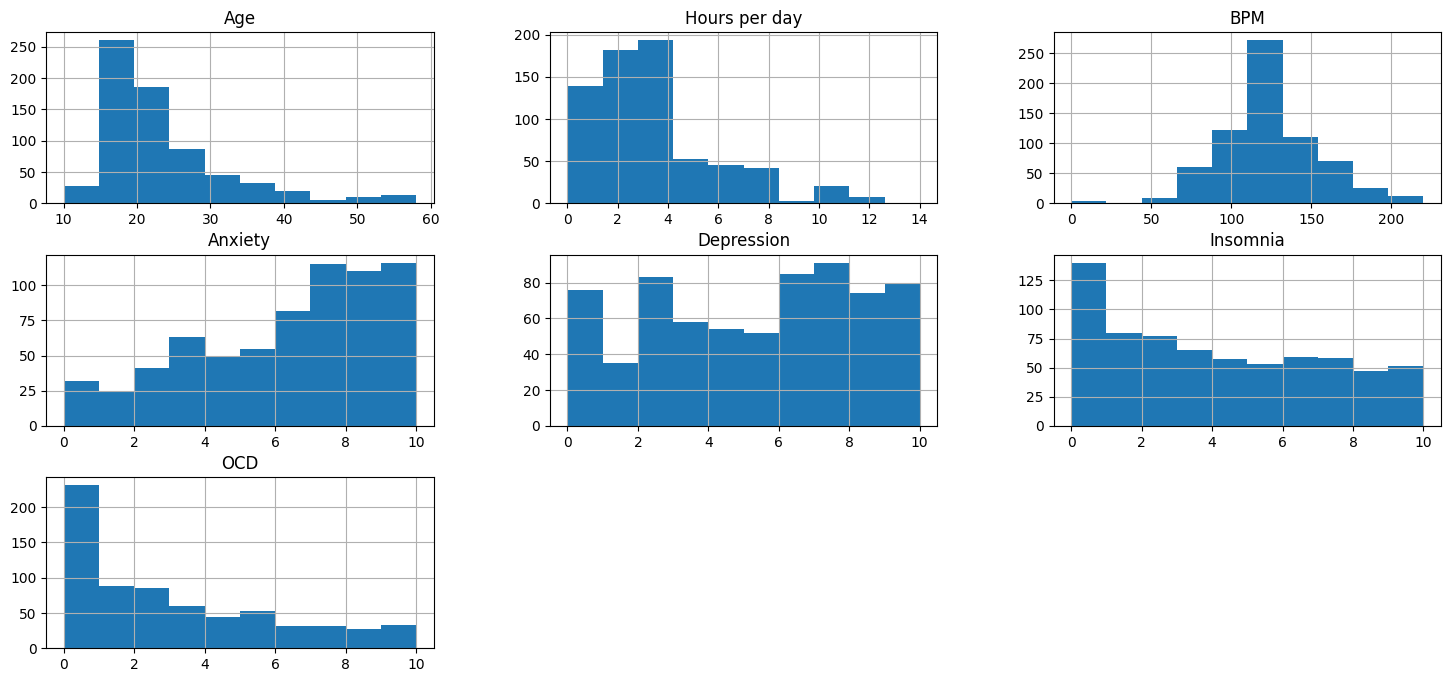

In [22]:
df_drop.hist(figsize=(18,8))


Captures more data of people between ages 15-25.

Most people listen to music for 1-4 hrs per day.

Beats per Minute usually ranges between 100-150.

Most people in the dataset deal with Anxiety and Depression. While comparitively less number of people deal with Insomnia and OCD.

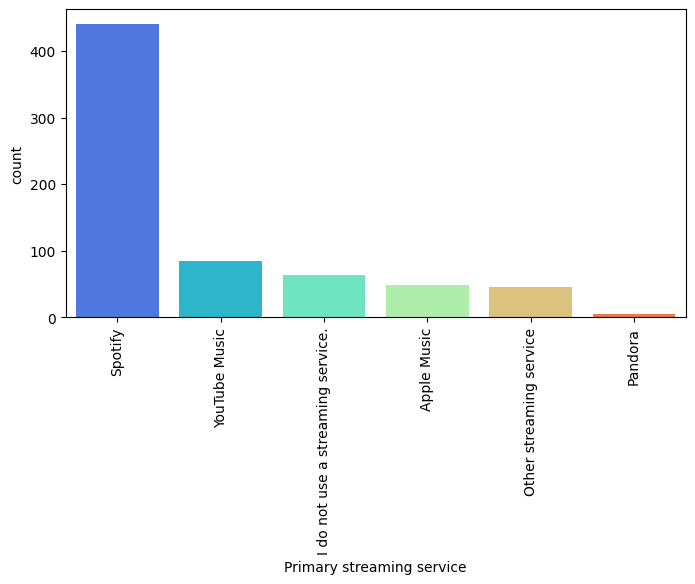

In [23]:
fig=plt.figure(figsize=(8,4))
sns.countplot(x=df_drop['Primary streaming service'],palette="rainbow")
plt.xticks(rotation=90)
plt.show()

Spotify is the most used streaming platform.

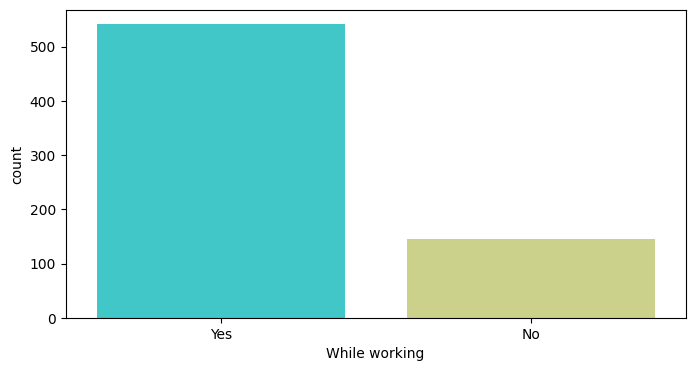

In [24]:
fig=plt.figure(figsize=(8,4))
sns.countplot(x=df_drop['While working'],palette="rainbow")
plt.show()

Majority of the listeners listen to music while working.

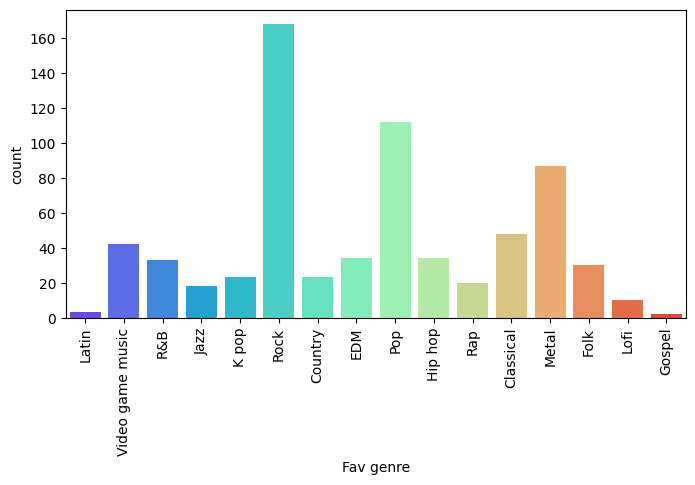

In [25]:
fig=plt.figure(figsize=(8,4))
sns.countplot(x=df_drop['Fav genre'],palette="rainbow")
plt.xticks(rotation=90)
plt.show()

Most of the users listen to Rock, Pop and Metal.

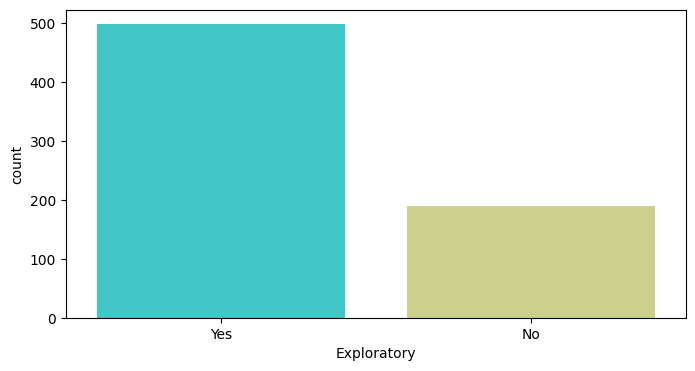

In [26]:
fig=plt.figure(figsize=(8,4))
sns.countplot(x=df_drop['Exploratory'],palette="rainbow")
plt.show()

New genres are being explored.

In [27]:
# Identify and drop columns with data type 'object'
numerical_data = df.select_dtypes(exclude=['object'])
numerical_data

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
0,18.0,3.0,156.0,3.0,0.0,1.0,0.0
1,63.0,1.5,119.0,7.0,2.0,2.0,1.0
2,18.0,4.0,132.0,7.0,7.0,10.0,2.0
3,61.0,2.5,84.0,9.0,7.0,3.0,3.0
4,18.0,4.0,107.0,7.0,2.0,5.0,9.0
...,...,...,...,...,...,...,...
731,17.0,2.0,120.0,7.0,6.0,0.0,9.0
732,18.0,1.0,160.0,3.0,2.0,2.0,5.0
733,19.0,6.0,120.0,2.0,2.0,2.0,2.0
734,19.0,5.0,170.0,2.0,3.0,2.0,1.0


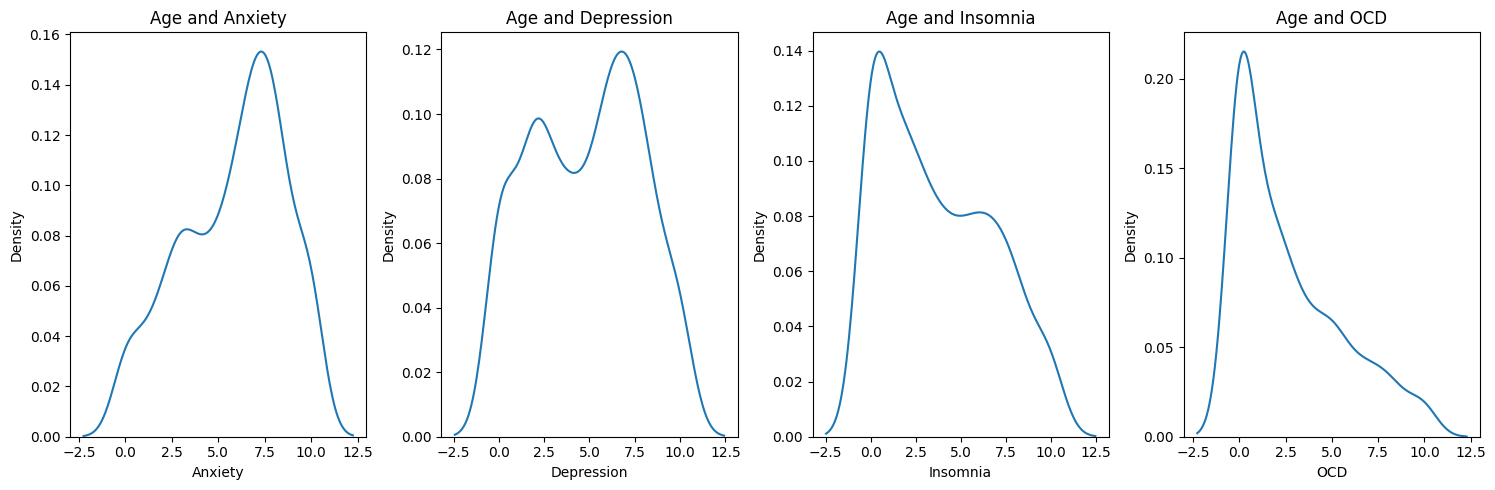

In [28]:
fig, axes = plt.subplots(1,4, figsize=(15,5)) #number of rows and columns along with mentioning size
to_plot=numerical_data.drop(columns=['Age','Hours per day','BPM'])
for feature,ax in zip(to_plot,axes.flatten()):
    if feature not in  ['Age','Hours per day','BPM']:
        sns.kdeplot(data=df, x = feature, ax = ax, palette = 'deep')
        ax.set_title(f'Age and {feature}')
plt.tight_layout();

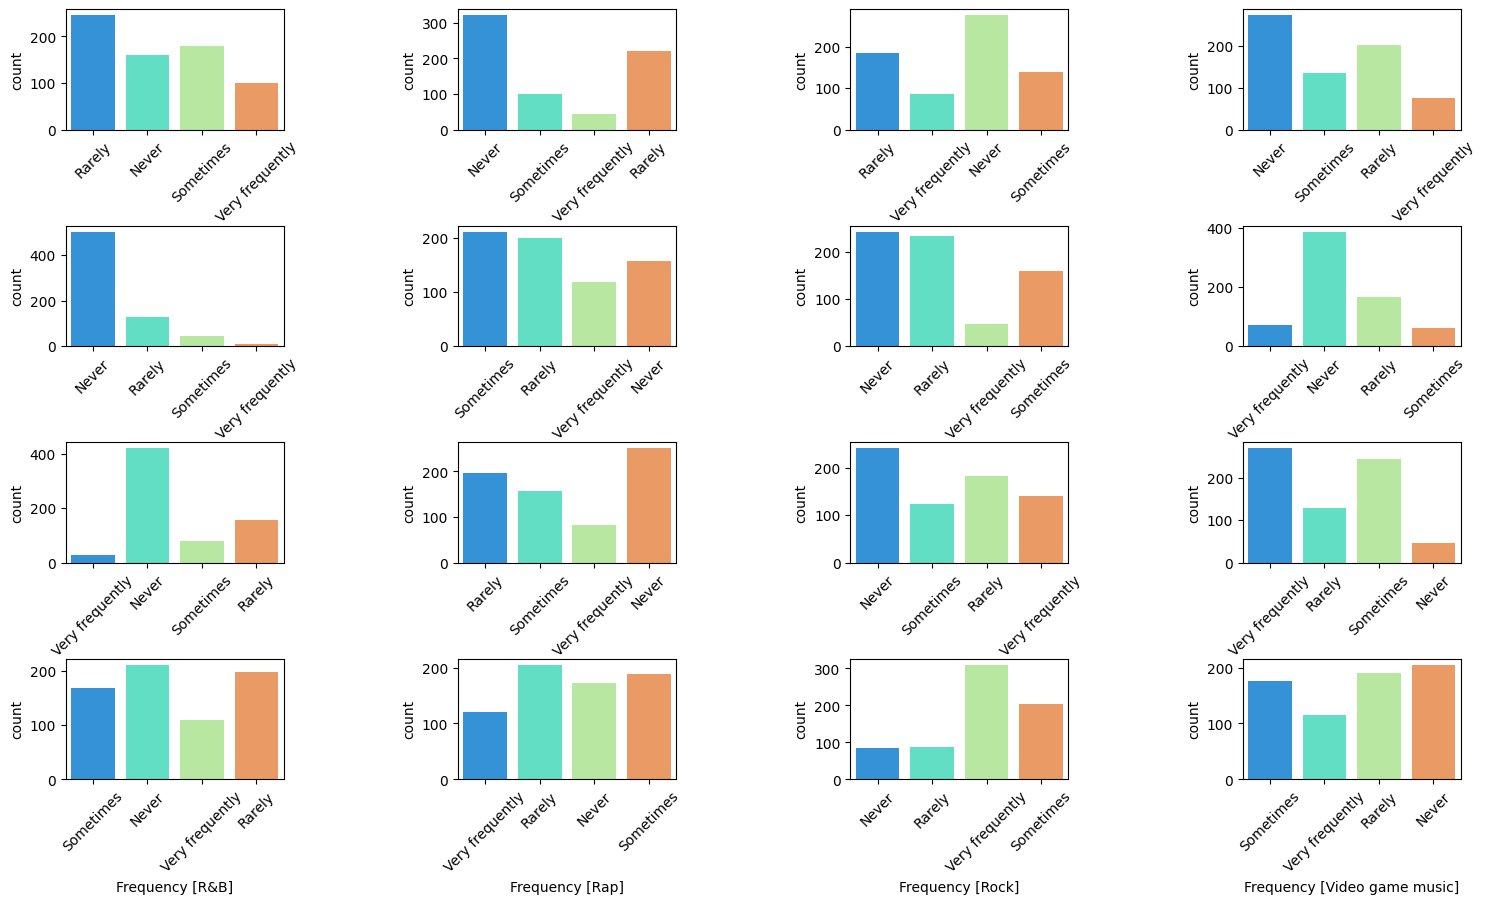

In [29]:
figure,axes=plt.subplots(4,4,figsize=(18,10))
plt.subplots_adjust(hspace=0.8, wspace=0.8)
sns.countplot(ax=axes[0,0],x=df_drop['Frequency [Classical]'],palette="rainbow")
sns.countplot(ax=axes[0,1],x=df_drop['Frequency [Country]'],palette="rainbow")
sns.countplot(ax=axes[0,2],x=df_drop['Frequency [EDM]'],palette="rainbow")
sns.countplot(ax=axes[0,3],x=df_drop['Frequency [Folk]'],palette="rainbow")
sns.countplot(ax=axes[1,0],x=df_drop['Frequency [Gospel]'],palette="rainbow")
sns.countplot(ax=axes[1,1],x=df_drop['Frequency [Hip hop]'],palette="rainbow")
sns.countplot(ax=axes[1,2],x=df_drop['Frequency [Jazz]'],palette="rainbow")
sns.countplot(ax=axes[1,3],x=df_drop['Frequency [K pop]'],palette="rainbow")
sns.countplot(ax=axes[2,0],x=df_drop['Frequency [Latin]'],palette="rainbow")
sns.countplot(ax=axes[2,1],x=df_drop['Frequency [Lofi]'],palette="rainbow")
sns.countplot(ax=axes[2,2],x=df_drop['Frequency [Metal]'],palette="rainbow")
sns.countplot(ax=axes[2,3],x=df_drop['Frequency [Pop]'],palette="rainbow")
sns.countplot(ax=axes[3,0],x=df_drop['Frequency [R&B]'],palette="rainbow")
sns.countplot(ax=axes[3,1],x=df_drop['Frequency [Rap]'],palette="rainbow")
sns.countplot(ax=axes[3,2],x=df_drop['Frequency [Rock]'],palette="rainbow")
sns.countplot(ax=axes[3,3],x=df_drop['Frequency [Video game music]'],palette="rainbow")
for ax in axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

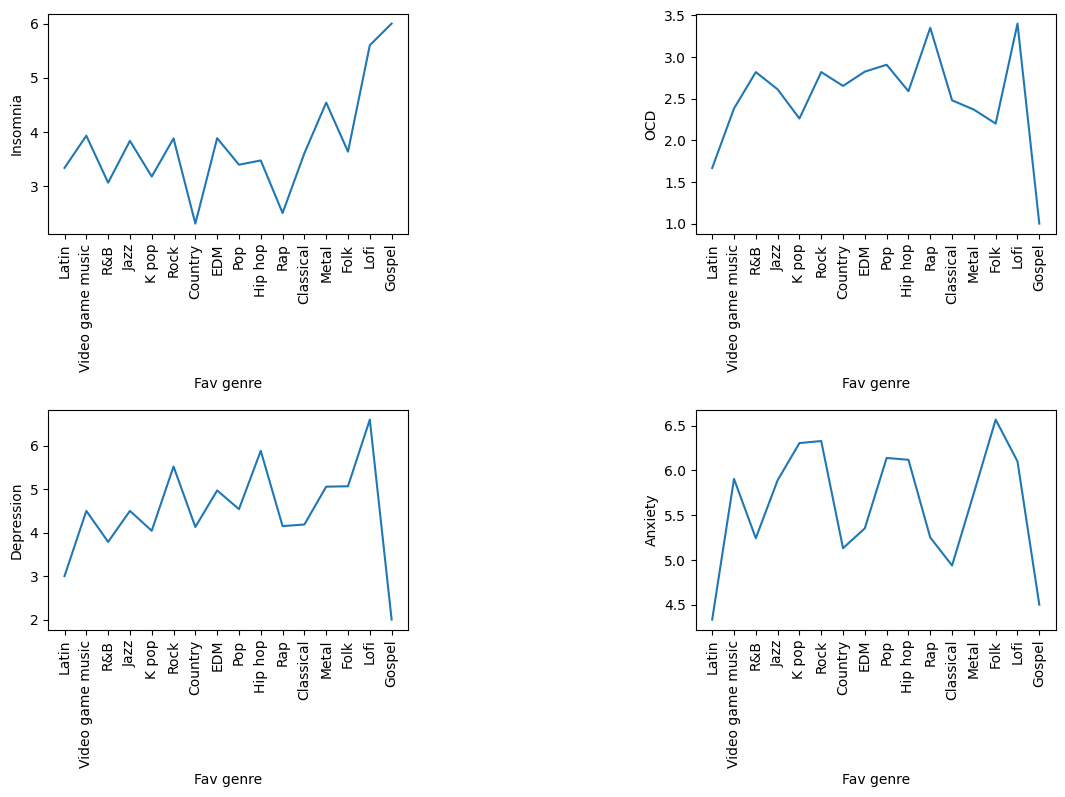

In [30]:
fig, axes = plt.subplots(2, 2, figsize=(13, 8))
plt.subplots_adjust(hspace=0.8, wspace=0.8)
sns.lineplot(ax=axes[0, 0], x=df_drop['Fav genre'], y=df_drop['Insomnia'], ci=None)
sns.lineplot(ax=axes[0, 1], x=df_drop['Fav genre'], y=df_drop['OCD'], ci=None)
sns.lineplot(ax=axes[1, 0], x=df_drop['Fav genre'], y=df_drop['Depression'], ci=None)
sns.lineplot(ax=axes[1, 1], x=df_drop['Fav genre'], y=df_drop['Anxiety'], ci=None)
for ax in axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

Gospel music is heard most by those dealing with insomnia and in the higher age groups and among the participants it has helped improve the condition.

Lofi music is heard most by those dealing with OCD, Anxiety and Depression and the age group is in mid 20's. Among the participants it has helped improve these conditions.

Video game music has worsening effects on all mental health conditions and hence should be avoided. Participants listening to video game music are usually in the early 20s age group which may have higher impact on their social functioning.

R&B, Jazz, K-pop, Country, EDM, Hip hop, Folk, Metal and Latin music either have no effect or help in improving the condition. But do not have any negative effects.

Rock music should be avoided by those dealing with Insomnia and Depression as it has chances of worsening the condition as compared to improving.

Classical music should be avoided by those dealing with OCD,Anxiety and Depression as it has chances of worsening the condition as compared to improving. For Insomnia there are more chances of improvemnt in condition than worsening.

Listening to Lofi and Gospel music for 4-6hrs can improve the consitions mentioned above.

While Video game music and pop, if heard for even 2 hours showed worsening of conditions in some participants.

Therefore different music has different impact on a person's mental condition. Hence depending on one's mood and general tendency and the number of hours they listen to music, certain genres can be suggested by recommendation systems in music apps to alleviate their condition